## TANZANIA WATER CLASSIFICATION

objectives
- To build a classification model which will be able to clasify whether the waterpumps are faulty are functional, not functional and non functional
- If population round the waterpoint affects the lifespan of the waterpump
- The majority pump investor by number
- Identify the relationship of the waterpump to other  

In [1052]:
# Loading relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")

In [1053]:
# loading the data
dataset_1 = pd.read_csv(r'C:\Users\espym.LAPTOP-41F90NSA\projects\practise\Tanzania Water\Tanzania-Water-Classification\Data\labels.csv')
dataset_2 = pd.read_csv(r'C:\Users\espym.LAPTOP-41F90NSA\projects\practise\Tanzania Water\Tanzania-Water-Classification\Data\testing.csv')
dataset_3 = pd.read_csv(r'C:\Users\espym.LAPTOP-41F90NSA\projects\practise\Tanzania Water\Tanzania-Water-Classification\Data\training_set.csv')

We have three sets of data. Training, testing and labels 

In [1054]:
# function to preview the data
def preview_data (data):
    print(data.columns)
    return preview_data

In [1055]:
preview_data(dataset_1)
preview_data(dataset_2)
preview_data(dataset_3)

Index(['id', 'status_group'], dtype='object')
Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')
Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meetin

<function __main__.preview_data(data)>

In [1056]:
dataset_1.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [1057]:
# merging the training and labels dataset 
data = pd.merge(dataset_1,dataset_3,on='id')
data

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


The data has 59400 rows and 41 columns

## Data Cleaning

In this section, we do data cleaning. We will check for:
- missing values
- duplicate values
- dropping columns which wont be used in the analysis
- correct data format

In [1058]:
# Checking if the columns are in their correct data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55763 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59398 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [1059]:
# Dropping the irrelevant columns column
columns_to_drop = [
  'scheme_name', 'num_private','date_recorded', 'wpt_name', 
  'subvillage', 'region', 'ward', 'lga','recorded_by', 'funder','quantity',
  'installer', 'management', 'payment','waterpoint_type','water_quality', 
  'extraction_type_group','extraction_type','source', 'id'
                     ]
data.drop(columns=columns_to_drop, inplace=True)

In [1060]:
# Checking null values
nulls = lambda x: data.isnull().sum()
nulls(data)

status_group                0
amount_tsh                  0
gps_height                  0
longitude                   0
latitude                    0
basin                       0
region_code                 0
district_code               0
population                  0
public_meeting           3334
scheme_management        3878
permit                   3056
construction_year           0
extraction_type_class       0
management_group            0
payment_type                0
quality_group               0
quantity_group              0
source_type                 0
source_class                0
waterpoint_type_group       0
dtype: int64

In [1061]:
for null_value in data.columns:
    percentage_null = round(data[null_value].isnull().sum() / len(data) * 100)
    print(f'{percentage_null}%')


0%
0%
0%
0%
0%
0%
0%
0%
0%
6%
7%
5%
0%
0%
0%
0%
0%
0%
0%
0%
0%


In [1062]:
# Handling the missing values
data.dropna(inplace=True)

The missing values account for a small percentage of the data. We will go ahead and drop the rows with missing values

In [1063]:
# previewing to check if the missing values have been replaced
data.isnull().sum().T

status_group             0
amount_tsh               0
gps_height               0
longitude                0
latitude                 0
basin                    0
region_code              0
district_code            0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type_class    0
management_group         0
payment_type             0
quality_group            0
quantity_group           0
source_type              0
source_class             0
waterpoint_type_group    0
dtype: int64

In [1064]:
# checking for duplicate values
data.duplicated().sum()

1086

In [1065]:
# dropping duplicates
data.drop_duplicates(inplace=True)

### Conversion of data types

In [1066]:
# Checking for columns values
data['construction_year'].value_counts()

construction_year
0       16262
2008     2430
2009     2306
2010     2011
2007     1425
2006     1329
2000     1252
2003     1190
2011     1032
1978      999
2004      989
2002      955
2005      881
1999      881
2012      836
1998      790
1995      783
1985      766
1984      711
1982      695
1972      680
1974      617
1990      615
1994      595
1980      577
1996      572
1992      512
1988      491
2001      480
1997      476
1993      463
1983      457
1975      402
1986      392
1976      368
1970      297
1989      293
1991      277
1987      272
1981      218
1973      183
1979      161
1977      153
2013      134
1971      125
1963       83
1967       83
1968       55
1969       55
1960       38
1964       27
1962       27
1961       20
1965       17
1966       16
Name: count, dtype: int64

We notice an irregularity in the construction year as we have many entries with 0. We will filter values with relevant years 1960 - 2013.

In [1067]:
# filtering construction year to start from 1960
data= data[(data['construction_year'] >= 1960) & (data['construction_year'] <= 2013)]

In [1068]:
# conversion of column format to date format
data.loc[:, 'construction_year'] = pd.to_datetime(data['construction_year'],format='%Y')

In [1069]:
data.shape

(32492, 21)

## Exploratory Data Analysis

The dataset has a combination of both numerical and categorical variables. We shall perform eda on both of them separately. 

### Categorical Variables

In [1070]:
# extracting the categorical variables
categorical = [column for column in data.columns if data[column].dtype == 'O']
print('The categorical variables: {} '.format(categorical))

The categorical variables: ['status_group', 'basin', 'public_meeting', 'scheme_management', 'permit', 'extraction_type_class', 'management_group', 'payment_type', 'quality_group', 'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group'] 


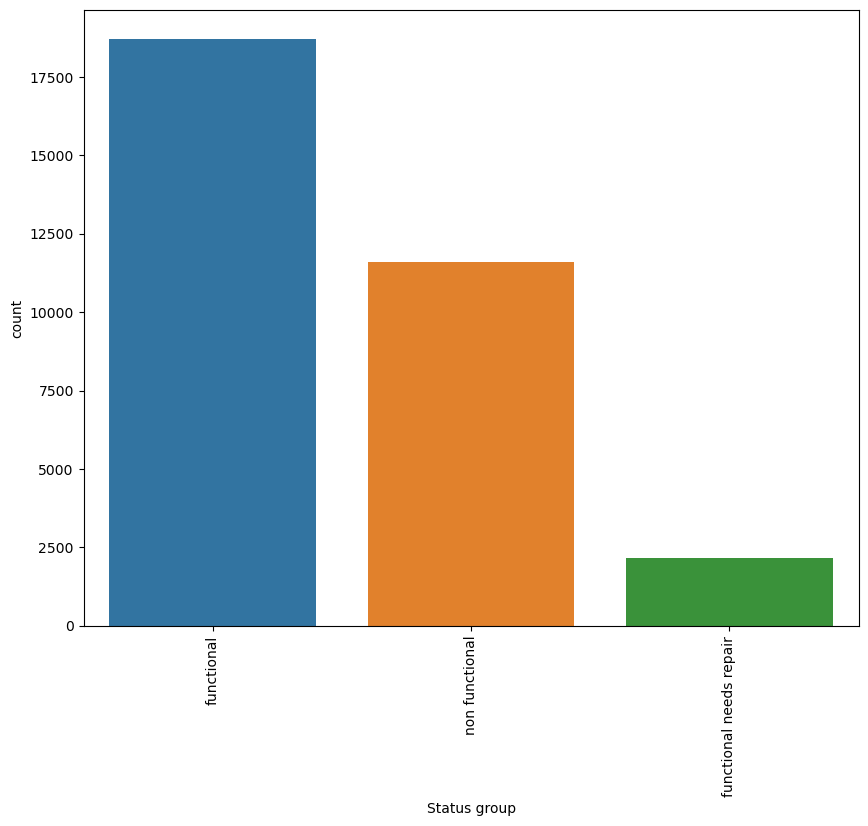

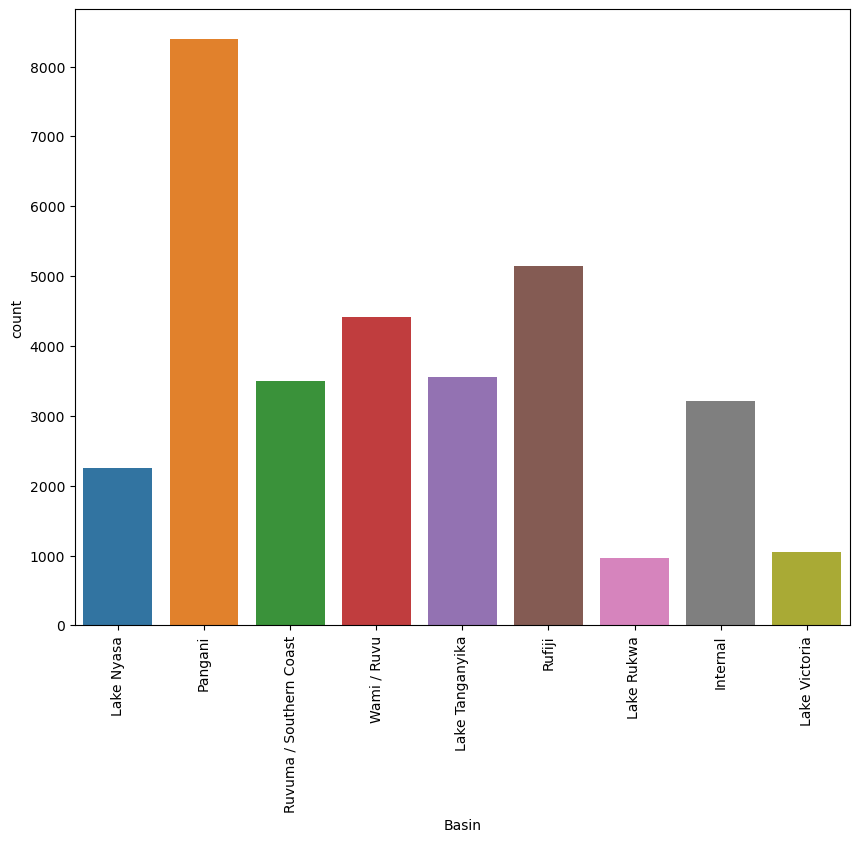

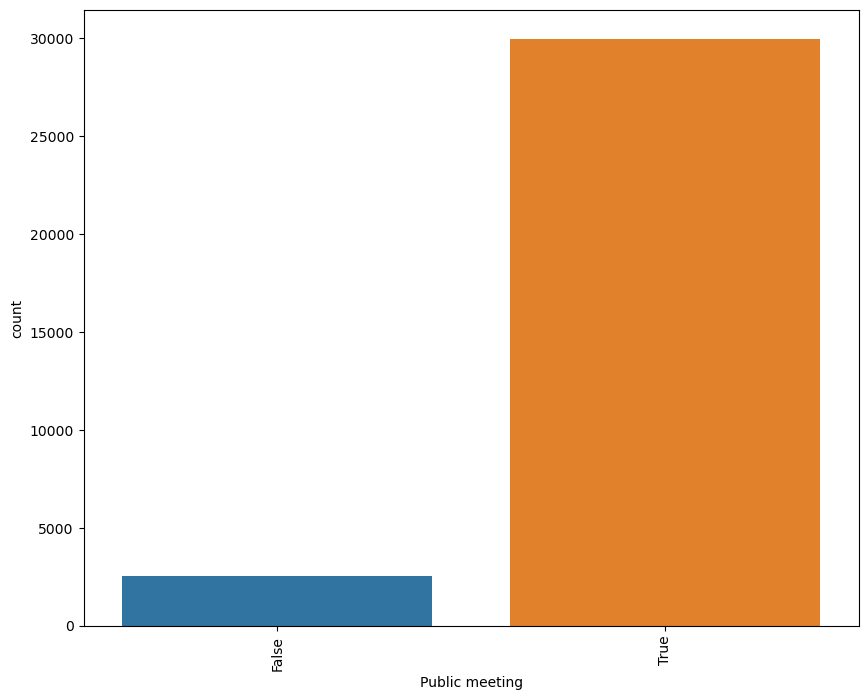

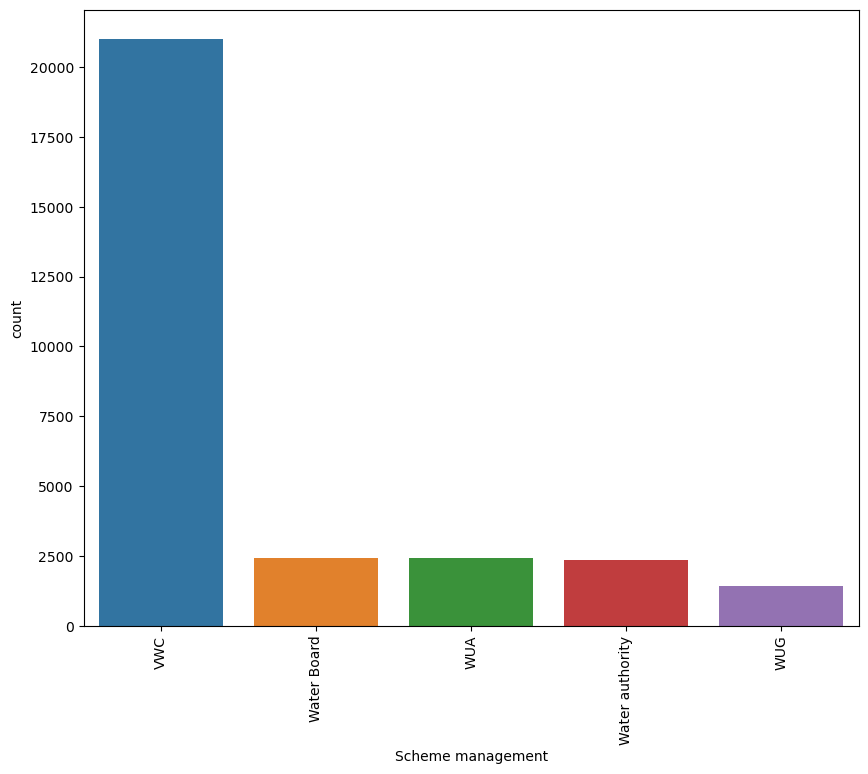

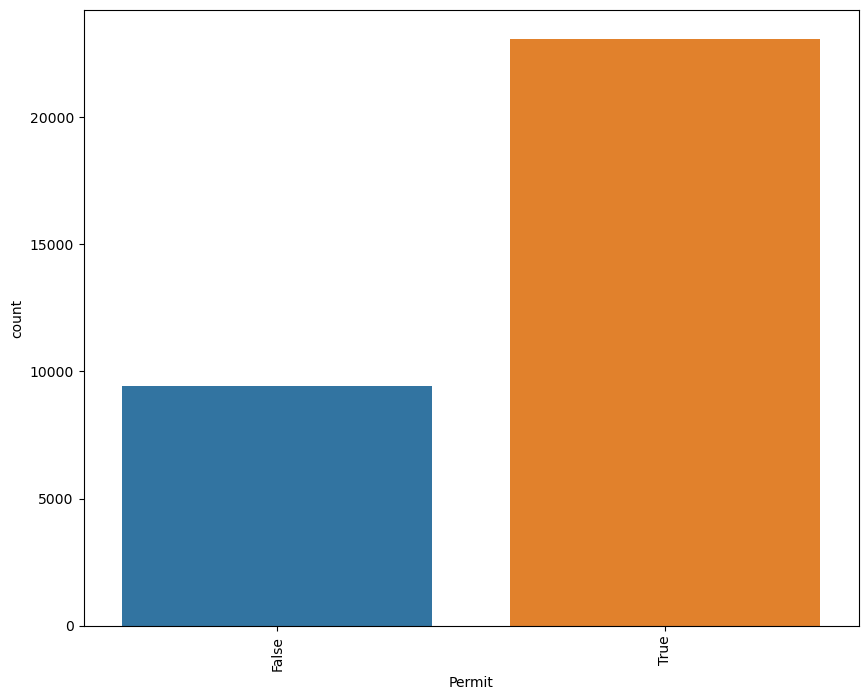

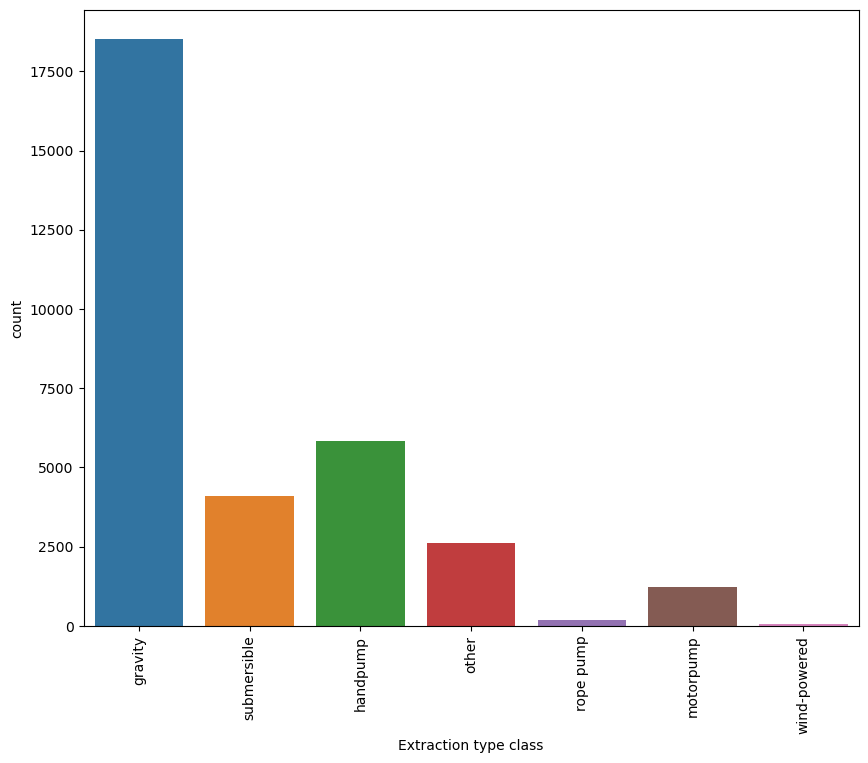

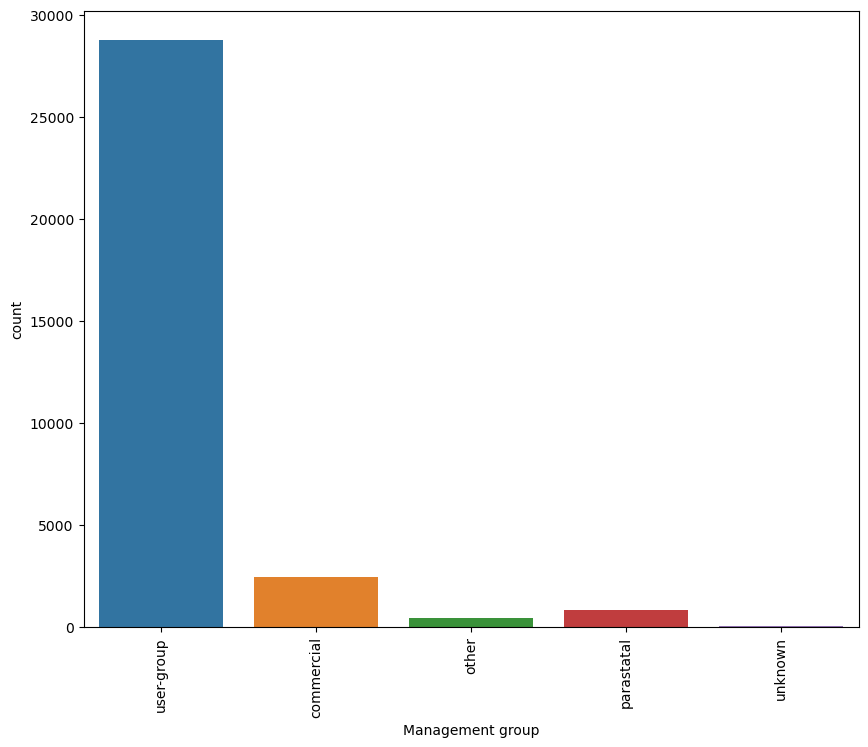

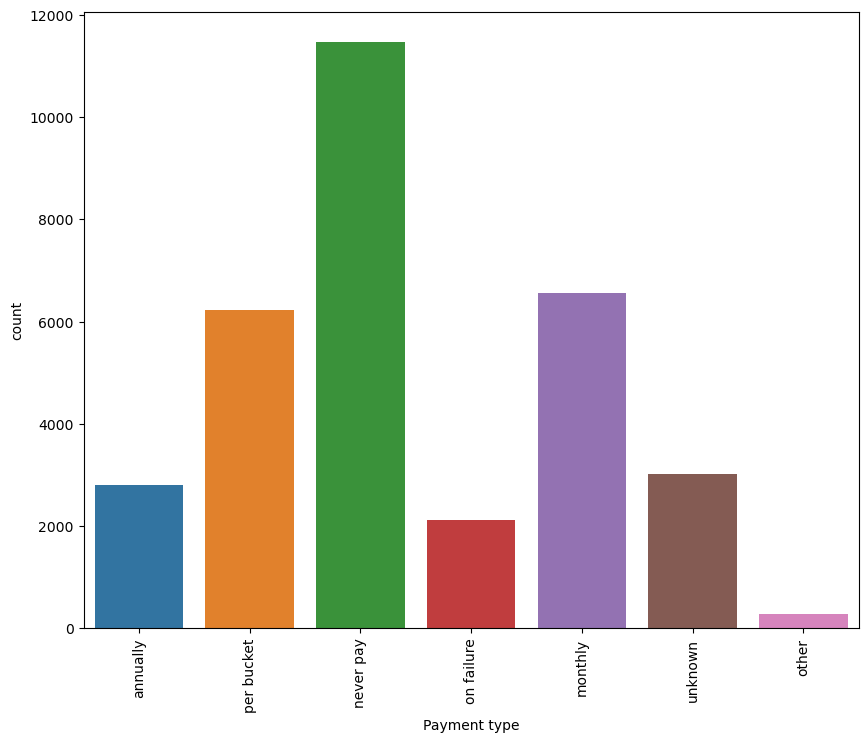

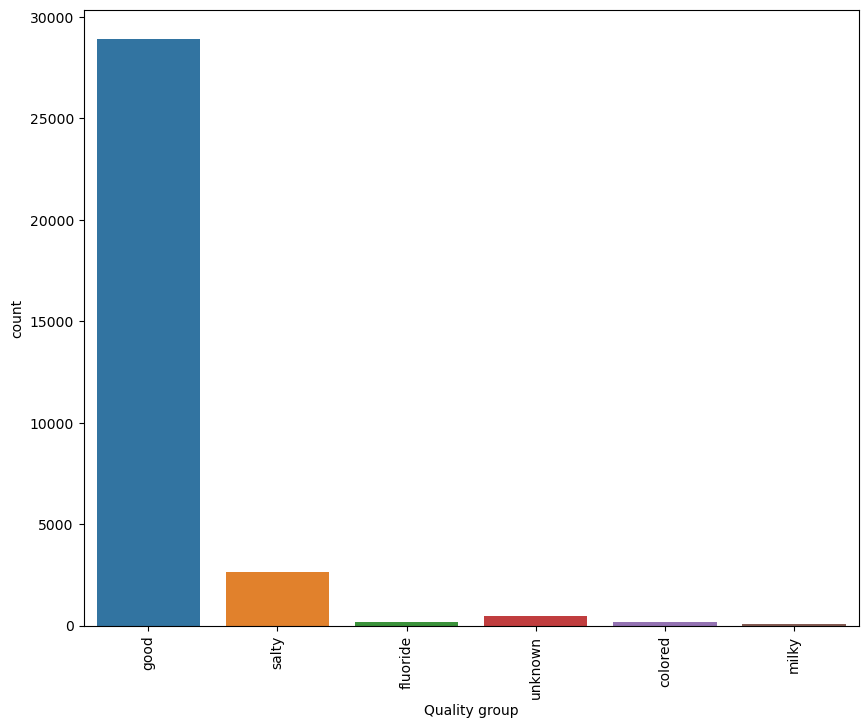

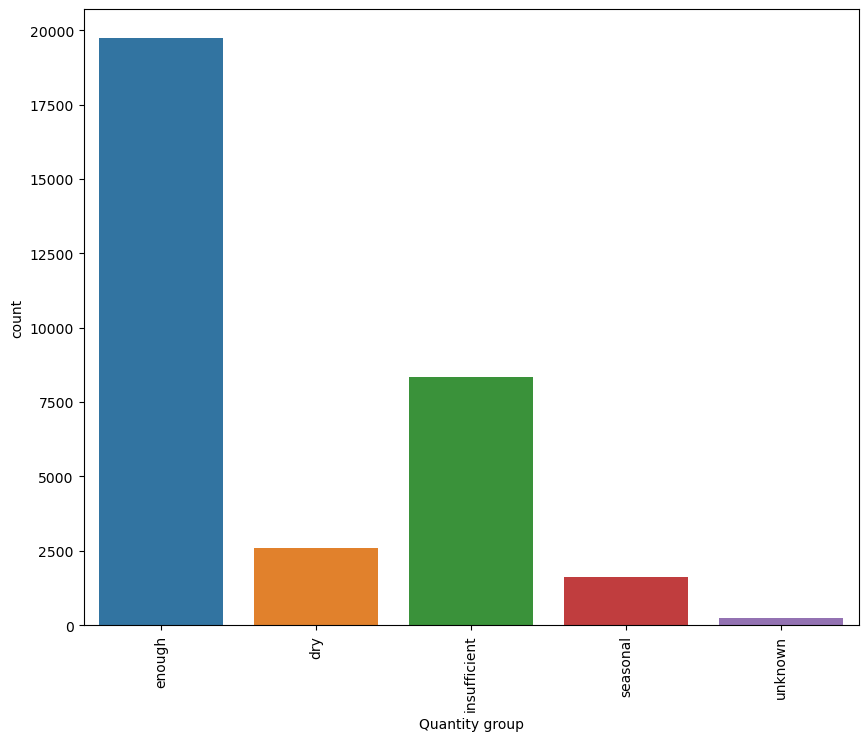

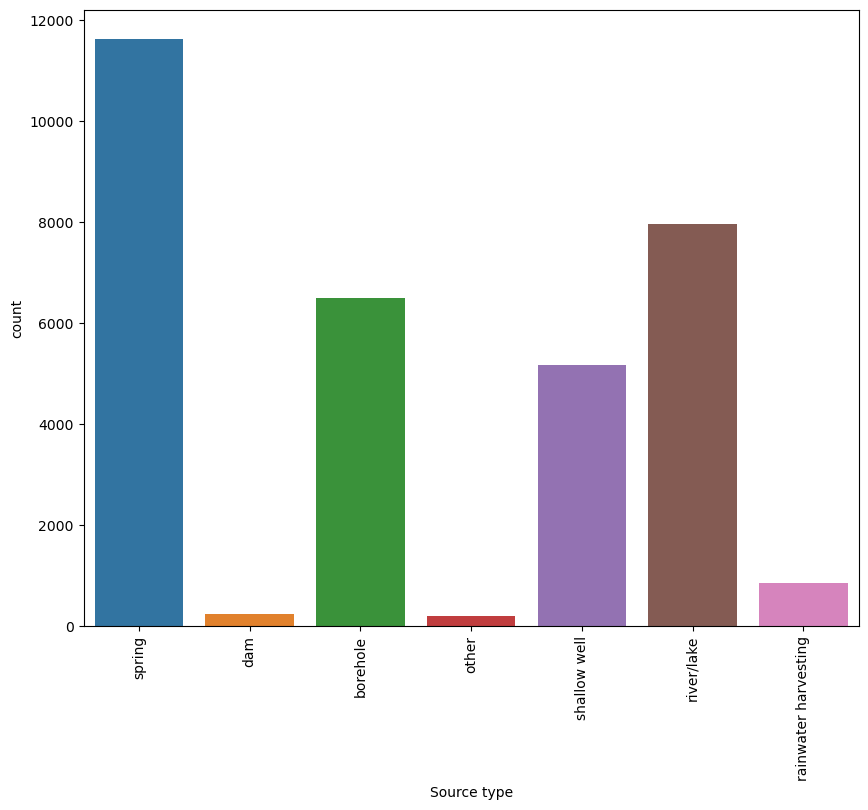

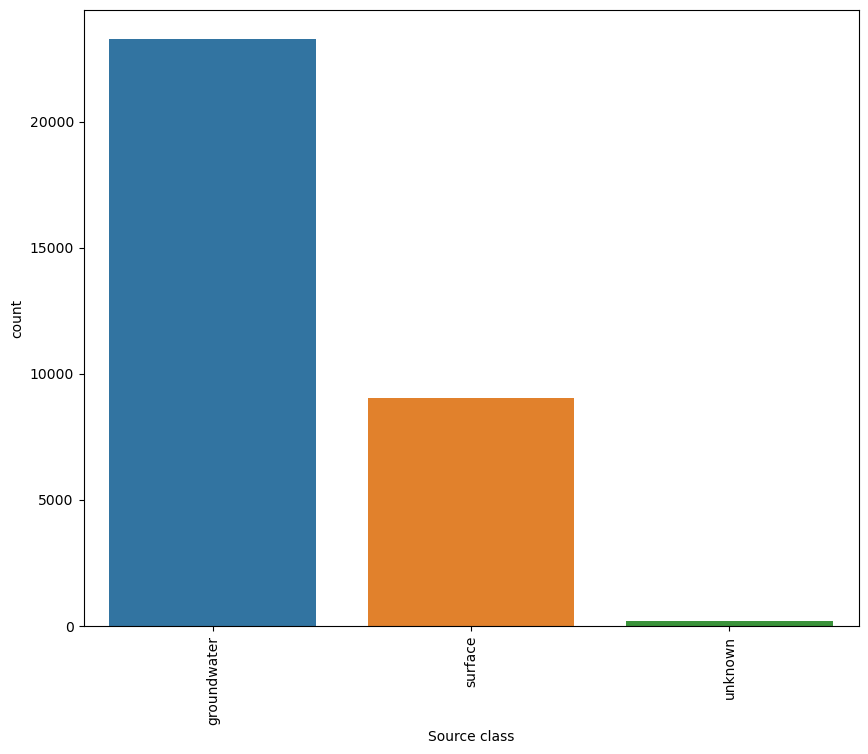

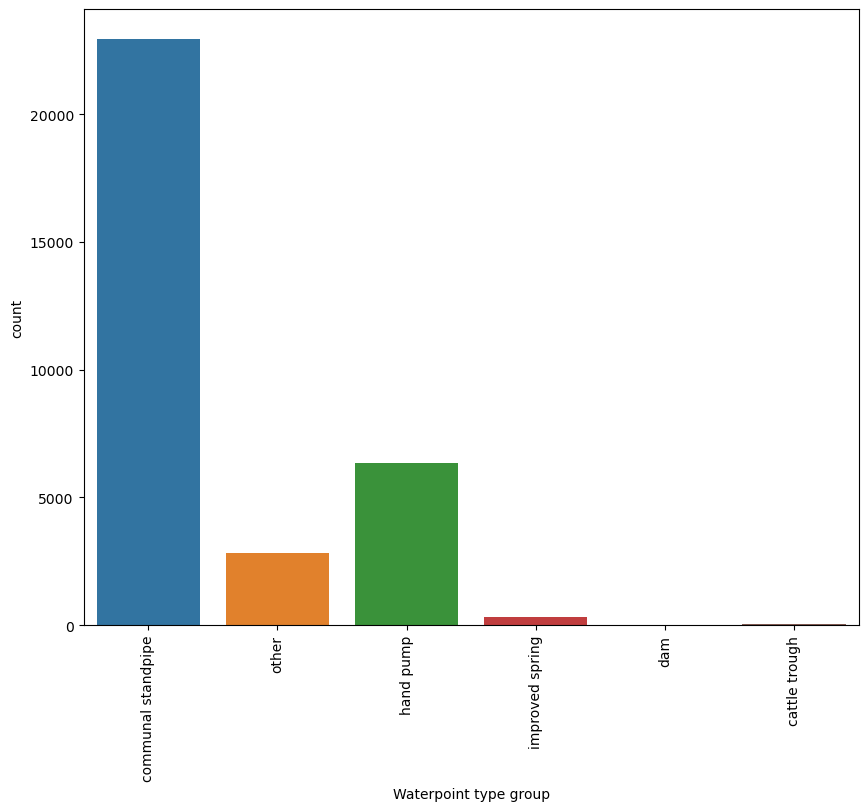

In [1071]:
# plotting the numerical variables
for cat in categorical:
    if len(data[cat].unique()) >= 10:
        top_5 = data[cat].value_counts().head(5)
        plt.figure(figsize=(10,8))
        sns.countplot(x= cat,data=data,order=top_5.index)
        plt.xticks(rotation=90)
        plt.xlabel(f'{cat}'.capitalize().replace("_", " "))
        plt.show()
    else:
        plt.figure(figsize=(10,8))
        sns.countplot(x= cat,data=data)
        plt.xlabel(f'{cat}'.capitalize().replace("_", " "))
        plt.xticks(rotation=90)
        plt.show()

In [1072]:
# checking for the percentage of values on the target column
percentage_status_group = pd.DataFrame(data['status_group'].value_counts(normalize=True))
percentage_status_group

,proportion
status_group,
functional,0.575680
non functional,0.357257
functional needs repair,0.067063


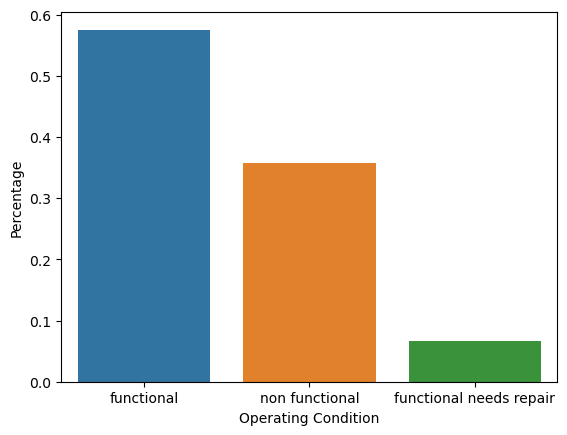

In [1073]:
# Plotting the percentage of the Operation Status of the waterpoints
percentage_status_group.reset_index(inplace=True)
percentage_status_group.columns = ['status_group', 'percentage']

sns.barplot(x='status_group',y='percentage',data=percentage_status_group)
plt.xlabel('Operating Condition')
plt.ylabel('Percentage')
plt.show() 

From the visualization, we see that 56% of the waterpoints are functional, 37% are non functional while 7% are functional but need repair 

### Numerical Variables

In [1074]:
# Extracting numerical variables from data
numerical = [column for column in data.columns if data[column].dtype != "O"]
print('The numerical columns: {}'.format(numerical))

The numerical columns: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population', 'construction_year']


In [1075]:
# Summary statistics of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32492 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   status_group           32492 non-null  object        
 1   amount_tsh             32492 non-null  float64       
 2   gps_height             32492 non-null  int64         
 3   longitude              32492 non-null  float64       
 4   latitude               32492 non-null  float64       
 5   basin                  32492 non-null  object        
 6   region_code            32492 non-null  int64         
 7   district_code          32492 non-null  int64         
 8   population             32492 non-null  int64         
 9   public_meeting         32492 non-null  object        
 10  scheme_management      32492 non-null  object        
 11  permit                 32492 non-null  object        
 12  construction_year      32492 non-null  datetime64[ns]
 13  extrac

In [1076]:
waterpoint_count_per_year = data.groupby('permit').count()
print(waterpoint_count_per_year)



        status_group  amount_tsh  ...  source_class  waterpoint_type_group
permit                            ...                                     
False           9436        9436  ...          9436                   9436
True           23056       23056  ...         23056                  23056

[2 rows x 20 columns]


## Data Preprocessing

In [1077]:
# # encoding the target column
target_encoding = {'functional': 0, 'non functional':1, 'functional needs repair':2}

data['status_group'] = data['status_group'].map(target_encoding) 

data['status_group'].value_counts()

status_group
0    18705
1    11608
2     2179
Name: count, dtype: int64

In [1078]:
new_features = {
    'communal standpipe': 'communal standpipe',
    'other' : 'other',
    'hand pump' : 'other',
    'improved spring' : 'other',
    'dam' : 'other', 
    'cattle_trough': 'other'
}

data['waterpoint_group'] = data['waterpoint_type_group'].map(new_features)


In [1079]:
basin_features = {
"Pangani" : "north",
'Rufiji' : "west",
"Wami / Ruvu": "other",
"Lake Tanganyika": "west", 
"Ruvuma / Southern Coast" : "other",
"Internal ": "north",
"Lake Nyasa" : "other",
"Lake Victoria": "north",
"Lake rukwa" : "west"
}

data['l_basin'] = data['basin'].map(basin_features)

In [1080]:
scheme_features = {
    "VWC": 'VWC',
    "Water Board": 'other',
    "WUA": 'other',
    "Water authority": 'other',
    "WUG": 'other',
    "Company": 'other',
    "Parastatal": 'other',
    "Private operator": 'other',
    "Other": 'other',
    "SWC": 'other',
    "Trust": 'other'
}

data['s_management'] =  data['scheme_management'].map(scheme_features)

In [1081]:
payment_mappings = {
    'never pay': 'never pay',
    'monthly': 'pay',
    'per bucket': 'pay',
    'annually': 'pay',
    'on failure': 'other',
    'other': 'other',
    'unknown': 'other'
}

data['payment'] = data['payment_type'].map(payment_mappings)

In [1082]:
quality_mappings = {
    'good': 'good',
    'salty': 'other',
    'unknown': 'other',
    'colored': 'other',
    'fluoride': 'other',
    'milky': 'other'
}

data['quality'] = data['quality_group'].map(quality_mappings)

In [1083]:
extraction_mappings = {
    'gravity': 'gravity',
    'handpump': 'other',
    'submersible': 'other',
    'other': 'other',
    'motorpump': 'other',
    'rope pump': 'other',
    'wind-powered': 'other'
}

data['extraction_class'] = data['extraction_type_class'].map(extraction_mappings)

In [1084]:
management_mappings = {
    'user-group': 'user-group',
    'commercial': 'other',
    'parastatal': 'other',
    'other': 'other',
    'unknown': 'other'
}

data['w_management'] = data['management_group'].map(management_mappings)

In [1085]:
quantity_mappings = {
    'enough': 'enough',
    'insufficient': 'other',
    'dry': 'other',
    'seasonal': 'other',
    'unknown': 'other'
}

data['quantity'] = data['quantity_group'].map(quantity_mappings)

In [1086]:
categorical_to_drop = [column for column in data.columns if (data[column].nunique() >= 5) & (data[column].dtype == "O")]

print('categories are {} '.format(categorical_to_drop))

categories are ['basin', 'scheme_management', 'extraction_type_class', 'management_group', 'payment_type', 'quality_group', 'quantity_group', 'source_type', 'waterpoint_type_group'] 


In [1087]:
# dropping columns which arent binned
data.drop(columns=categorical_to_drop, inplace=True)

In [1088]:
categorical_to_encode = [column for column in data.columns if (data[column].nunique() <= 5 ) & (data[column].dtype == "O")]

categorical_to_encode

['public_meeting',
 'permit',
 'source_class',
 'waterpoint_group',
 'l_basin',
 's_management',
 'payment',
 'quality',
 'extraction_class',
 'w_management',
 'quantity']

In [1089]:
data[numerical]

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
0,6000.0,1390,34.938093,-9.856322,11,5,109,1999-01-01
2,25.0,686,37.460664,-3.821329,21,4,250,2009-01-01
3,0.0,263,38.486161,-11.155298,90,63,58,1986-01-01
5,20.0,0,39.172796,-4.765587,4,8,1,2009-01-01
10,0.0,62,39.209518,-7.034139,60,43,345,2011-01-01
...,...,...,...,...,...,...,...,...
59391,0.0,540,38.044070,-4.272218,3,3,210,1967-01-01
59394,500.0,351,37.634053,-6.124830,5,6,89,2007-01-01
59395,10.0,1210,37.169807,-3.253847,3,5,125,1999-01-01
59396,4700.0,1212,35.249991,-9.070629,11,4,56,1996-01-01


In [1090]:
# # scaling the numerical variables
# Remove 'construction_year' from numerical columns
from sklearn.preprocessing import StandardScaler
numerical_cols = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population', 'construction_year']
numerical_cols.remove('construction_year')

# Scale numerical columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the final encoded and scaled DataFrame
print(data.head())

    status_group  amount_tsh  gps_height  ...  extraction_class  w_management  quantity
0              0    1.694413    0.601444  ...           gravity    user-group    enough
2              0   -0.151582   -0.536912  ...           gravity    user-group    enough
3              1   -0.159305   -1.220895  ...             other    user-group     other
5              0   -0.153126   -1.646162  ...             other    user-group    enough
10             0   -0.159305   -1.545909  ...             other         other    enough

[5 rows x 20 columns]


In [1091]:
numerical_cols.append('status_group')

In [1093]:
# One-hot encode categorical columns
encoded_data = pd.get_dummies(data[categorical_to_encode], dtype=int)

# Combine encoded categorical columns with numerical columns
final_data = pd.concat([data[numerical_cols], encoded_data], axis=1)

# Display the final encoded DataFrame
print(final_data.head())

    amount_tsh  gps_height  ...  quantity_enough  quantity_other
0     1.694413    0.601444  ...                1               0
2    -0.151582   -0.536912  ...                1               0
3    -0.159305   -1.220895  ...                0               1
5    -0.153126   -1.646162  ...                1               0
10   -0.159305   -1.545909  ...                1               0

[5 rows x 33 columns]


### Modeling

In [1099]:
# Defining X and y
X = final_data.drop(['status_group'], axis=1)
y = final_data['status_group']

In [1100]:
# splitting the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1101]:
# balancing the classes in the target column
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Convert X_resampled and y_resampled back to DataFrame if needed
X_resampled_df = pd.DataFrame(X_resampled, columns=X_train.columns)
y_resampled_df = pd.Series(y_resampled, name='target')

# Check the class distribution after applying SMOTE
print(y_resampled_df.value_counts())

target
0    14990
1    14990
2    14990
Name: count, dtype: int64


### Baseline Model

In [1103]:

lr = LogisticRegression()

lr.fit(X_resampled,y_resampled)

y_pred_lr = lr.predict(X_test) 

In [1104]:
# Evaluating the baseline model
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred_lr)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred_lr)))
# print('Confusion Matrix')
# print('{}'.format(confusion_matrix(y_test, y_pred_lr)))

Accuracy: 
0.5868595168487459
Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.58      0.66      3715
           1       0.57      0.62      0.60      2346
           2       0.17      0.40      0.24       438

    accuracy                           0.59      6499
   macro avg       0.50      0.54      0.50      6499
weighted avg       0.65      0.59      0.61      6499



In [1105]:

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_resampled,y_resampled)
y_pred_rfc = rfc.predict(X_test)

In [1106]:
# Evaluation of the random forest model
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred_rfc)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred_rfc)))

Accuracy: 
0.7582705031543314
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      3715
           1       0.75      0.76      0.75      2346
           2       0.37      0.45      0.41       438

    accuracy                           0.76      6499
   macro avg       0.65      0.67      0.66      6499
weighted avg       0.77      0.76      0.76      6499



In [1107]:
# Tuning the Random Forest Classifier Model
# Define the grid of hyperparameters to search
from sklearn.model_selection import GridSearchCV
parameters_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 5, 10, 15],   # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}
# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate model performance on test set
accuracy = best_estimator.score(X_test, y_test)


KeyboardInterrupt: 